<a href="https://colab.research.google.com/github/HasanDabbas0/Hasan-Dabbas/blob/main/Diffeqs_lab_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1 «Численное решение дифференциальных уравнений»



## Вступление

В первой лабораторной Вашей задачей будет изучить и реализовать различные методы для численного решения дифференциальных уравнений.

Наверное, из курса физики Вы успели заметить, что дифференциальные уравнения появляются при описании явлений современного мира практически повсеместно, и практически никогда эти уравнения невозможно разрешить даже в квадратурах (выразив $y(x)$ через элементарные функции и интегралы от них). Для их решения исполльзуются приближённые или численные методы, в которых Вам и предстоит разобраться.

## Задание 1. Численное решение дифференциального уравнения первого порядка.

Реализуем функции численного решения дифференциальных уравнений.


### Описание задачи

Так как дальше нам понадобится решать систему уравнений, то сразу будем решать задачу Коши
$$
\begin{cases} x(t)' = f(t, x(t)),\\ x(t_0) = x_0 \end{cases} \quad \text{где } x,x_0 \in \mathbb{R}^n, \ t \in [t_0,T].
$$

Рассмотрим два, наверное, самых распространенных метода:
- Метод ломаных Эйлера,
- Метод Рунге—Кутты.

Импортируем необходимые нам далее библиотеки.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#### Метод ломаных Эйлера

Метод Эйлера — это канонический и, честно говоря, простейший численный метод для решения дифференциальных уравнений. Мы будем искать приближение решения в виде ломаной. Для того, чтобы построить ломаную, нужно найти координаты ее вершин, этим и займемся.



##### Теоретические выкладки

Зададим на отрезке $[t_0, T]$ некоторое разбиение $\big\{t_m\big\}_{m=0}^M$.

Пусть $\varphi(t)$ — истинное решение. Разложим функцию$^*$ $\varphi(t)$ по Тейлору в точке $t_k ,\;  k \in \{0,1,\dots,M-1\}$:
$$
\varphi(t) = \varphi(t_k) + (t-t_k)\cdot \varphi'(t_k) + \mathrm{\overline o}\left(t-t_k\right).
$$
Подставим $t=t_{k+1}$:
$$
\varphi(t_{k+1}) = \varphi(t_k) + (t_{k+1}-t_k)\cdot \varphi'(t_k)  + \mathrm{\overline o}\left(t_{k+1}-t_k \right).
$$
Обозначим $h_k = t_{k+1} - t_k$ и обрубим наше разложение, отбросив о-малое. Тогда
$$
\psi(t_{k+1}) = \varphi(t_k) + h_k \cdot \varphi'(t_k)
$$
— приближенное значение $\varphi(t_{k+1})$, $\psi(t_0) = x_0$.

Так как $\varphi(t)$ — решение уравнения $x'=f(t,x)$, то $\varphi'(t) = f(t, \varphi(t))$, а значит
$$
\psi(t_{k+1}) = \varphi(t_k) + h_k \cdot f(t_k, \varphi(t_k)).
$$
Так как $\psi(t_k)$ — приближенное значение $\varphi (t_k)$, то, с некоторой потерей точности, в правой части можем заменить все $\varphi(t_k)$ на $\psi(t_k)$.

Тогда получаем множество упорядоченных вершин ломаной Эйлера:
$$\boxed{\psi(t_{k+1}) = \psi(t_k) + h_k \cdot f(t_k, \psi(t_k)), \quad \psi(t_0) = x_0}$$

Тогда для построения приближенного решения задачи Коши достаточно запустить вычисление вплоть до $\psi(t_M)$.

Более подробно, а именно: то, почему метод сходится, какая погрешность получается и т.д., обсуждалось на практических занятиях.

<sub>* В случае, когда у нас система уравнений, то есть $x$ является вектором, просто проделываем данные рассуждения  покомпонентно.</sub>

##### Реализация метода

Реализуйте метод ломаных Эйлера для задачи Коши
$$
\begin{cases}
x'(t) = f(t, x(t)),\\
x(t_0) = x_0,\\
t\in [t_0, T].
\end{cases}
$$
в функции `Euler_method`, принимающей в качестве аргументов:
- `fun` — функция, задающая правую часть уравнения,
- `t` — список с границами отрезка — список $[t_0, T]$,
- `x_0` — вектор$_{(n\times 1)}$ начального значения при $t=t_0$,
- `dt` — величина $h_k$ (для простоты примем разбиение равномерным),
- `args` — словарь с аргументами для функции `fun` (в Python можно передавать в аргументы функции словарь [с помощью оператора `**` перед словарем](https://stackoverflow.com/questions/334655/passing-a-dictionary-to-a-function-as-keyword-parameters)),

и возвращающей список с первой координатой — массивом с точками разбиения $t_k$, а второй — массивом со значениями приближенного решения в этих точках.

In [11]:
'''
Реализация метода ломаных Эйлера в функции Euler_method
'''

def Euler_method(fun, t, x_0, dt, args={}):
    t_start, t_end = t
    t_steps = np.arange(t_start, t_end + dt, dt)
    x = np.zeros((len(t_steps), len(x_0)))
    x[0] = x_0
    for k in range(len(t_steps) - 1):
        x[k+1] = x[k] + dt * fun(t_steps[k], x[k], **args)
    return [t_steps, x]

#### Метод Рунге-Кутты

Теперь рассмотрим не столько геометрически понятный, но достаточно часто применяемый на практике метод Рунге—Кутты, ограничившись лишь вторым порядком последнего.

##### Теоретические выкладки

Так как $\varphi$ — решение исходной задачи Коши, то $\varphi'(t) = f(t, \varphi(t))$, а также
$$
\varphi''(t) = \frac{d}{d t} f(t, \varphi(t)) = \frac{\partial f(t, \varphi)}{\partial t} + \frac{\partial f(t, \varphi)}{\partial \varphi} \frac{d\varphi(t)}{dt}= \frac{\partial f(t, \varphi)}{\partial t} + \frac{\partial f(t, \varphi)}{\partial \varphi} f(t,\varphi(t)).
$$

Аналогично тому, что делали ранее, воспользуемся разложением Тейлора на отрезке в точке $t_k$ и подставим точку $t_{k+1}$:
$$
\varphi(t_{k+1}) = \varphi(t_k) + (t_{k+1}-t_k)\cdot \varphi'(t_k) + \frac{1}{2}(t_{k+1}-t_k)^2\cdot \varphi''(t_k) + \mathrm{\overline o}\left((t_{k+1}-t_k)^2\right).
$$
Отбросим слагаемое с о-малым, тем самым переходя к приближению $\psi$ функции $\varphi$; подставим выражения для $\varphi'$, $\varphi''$. Получим
$$
\psi(t_{k+1}) = \psi(t_k) + (t_{k+1}-t_k)\cdot f(t_k, \psi(t_k)) + \frac{1}{2}(t_{k+1}-t_k)^2\cdot \left.\left(f'_t(t, \psi) + f'_\psi(t, \psi) f(t,\psi(t))\right)\right|_{(t_k, \psi(t_k))}. \tag{o}
$$

Запишем теперь разложение Тейлора функции двух переменных $f(t,\psi)$ в точке $(t_k, \psi(t_k))$ и подставим точку $\big(t_{k}+\alpha (t_{k+1} - t_k), \psi(t_{k})+ \alpha(t_{k+1}-t_k)f(t_k, \psi(t_k))\big)$, где $\alpha > 0$ --- параметр метода,
$$
f\big(t_{k}+\alpha (t_{k+1} - t_k), \psi(t_{k})+ \alpha(t_{k+1}-t_k)f(t_k, \psi(t_k))\big) \approx f(t_k, \psi(t_k)) + \alpha(t_{k+1}-t_k)f'_t(t_k, \psi(t_k)) + \alpha(t_{k+1} - t_k)  f(t_k, \psi(t_k))f'_\psi(t_k, \psi(t_k)).
$$

Заметим, что это очень похоже на правую часть в выражении (o). Тогда, домножив на $\frac{1}{2\alpha} (t_{k+1}-t_k)$, получим
$$
\psi(t_{k+1}) = \psi(t_k) + \left(1-\frac{1}{2\alpha}\right) (t_{k+1}-t_k)\cdot f(t_k, \psi(t_k)) + \frac{1}{2\alpha}(t_{k+1} - t_k) f\big(t_{k}+\alpha (t_{k+1} - t_k), \psi(t_{k})+ \alpha(t_{k+1}-t_k)f(t_k, \psi(t_k))\big).
$$

Или, вводя обозначение длины шага $h_k = t_{k+1} - t_k$, получаем итерационную схему для метода Рунге—Кутты 2-ого порядка
$$
\psi(t_{k+1}) = \psi(t_k) + \left(1-\frac{1}{2\alpha}\right) h_k \cdot \underbrace{f(t_k, \psi(t_k))}_{k_1} + \frac{1}{2\alpha} h_k \cdot  \underbrace{f\big(t_{k}+\alpha h_k, \psi(t_{k})+ \alpha h_k f(t_k, \psi(t_k))\big)}_{k_2},
$$
Переобозначив под более принятые обозначения, получим
$$
\boxed{
    \begin{split}
        &\psi(t_{k+1}) = \psi(t_k) + b_1 h_k k_1 + b_2 h_k k_2,\\
        & k_1 = f(t_k, \psi(t_k)), \quad k_2 = f\big(t_{k}+a_{21} h_k, \psi(t_{k})+ a_{21} h_k f(t_k, \psi(t_k))\big),\\
        & b_1, b_2 \geqslant 0, \quad b_1 + b_2 = 1, \quad a_{21} = \frac{1}{2b_2}.
    \end{split}
}
$$


##### Реализация метода

Реализуйте метод Рунге-Кутты для задачи Коши
$$
\begin{cases}
x'(t) = f(t, x(t)),\\
x(t_0) = x_0,\\
t\in [t_0, T].
\end{cases}
$$
в функции `Runge_Kutta_method`, принимающей в качестве аргументов:
- `fun` — функция, задающая правую часть уравнения,
- `t` — список с границами отрезка — список $[t_0, T]$,
- `x_0` — вектор$_{(n\times 1)}$ начального значения при $t=t_0$,
- `dt` — величина $h_k$ (для простоты примем разбиение равномерным),
- `args` — словарь с аргументами для функции `fun` (в Python можно передавать в аргументы функции словарь [с помощью оператора `**` перед словарем](https://stackoverflow.com/questions/334655/passing-a-dictionary-to-a-function-as-keyword-parameters)),

и возвращающей список с первой координатой — массивом с точками разбиения $t_k$, а второй — массивом со значениями приближенного решения в этих точках.

В зависимости от Вашего номера в таблице, возьмите $b_2 = \frac{1}{(\mathrm{\text{номер в табличке}}~mod~8) + 1}$

In [12]:
'''
Реализация метода Рунге—Кутты в функции Runge_Kutta_method
'''

def Runge_Kutta_method(fun, t, x_0, dt, args={}):
    t_start, t_end = t
    t_steps = np.arange(t_start, t_end + dt, dt)
    x = np.zeros((len(t_steps), len(x_0)))
    x[0] = x_0
    b2 = 0.5
    b1 = 1 - b2
    a21 = 1 / (2 * b2)
    for k in range(len(t_steps) - 1):
        k1 = fun(t_steps[k], x[k], **args)
        k2 = fun(t_steps[k] + a21 * dt, x[k] + a21 * dt * k1, **args)
        x[k+1] = x[k] + dt * (b1 * k1 + b2 * k2)
    return [t_steps, x]


#### Примеры

Давайте проверим Вашу реализацию на примерах.

###### 1. Оба метода справляются неплохо

Придумайте пример дифференциального уравнения Бернулли c $\alpha = (\mathrm{\text{номер в табличке}}~mod~4) + 1$, для которого Вы можете найти точное решение в явном виде и предложенные методы дают хорошие результаты. Также придумайте некоторые начальные условия и отрезок, на котором ищется решение.

Решите задачу аналитическим (это Вам придется сделать честным способом на бумажке)

---
> ❗ **Место для Вашего решения дифференциального уравнения**❗
>
> *Вы можете приложить фотографию с решением, используя гугл-диск (как это сделать можно глянуть [здесь](https://stackoverflow.com/questions/50670920/how-to-insert-an-inline-image-in-google-colaboratory-from-google-drive)).*
>
> Вы можете оставить ссылку на файл, лежащий на гугл диске (не забудьте дать доступ на чтение по ссылке)
>
> Вы также можете записать решение, используя Latex, который colab поддерживает.
>
---

In [13]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f1(t, x):
    return x - x**2

In [14]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi1(t):
    return 1 / (1 + np.exp(-t))

Проведите **анализ** относительно связи величины шага $h$, метода и получившейся ошибки.

> Ваше исследование должно содержать как минимум:
- сравнение ошибок для метода Эйлера с разными значениями шага ($\geqslant 3$),
- сравнение ошибок для метода Рунге-Кутты с разными значениями шага ($\geqslant 3$),
- сравнение методов Эйлера и Рунге-Кутты между собой:
    - разница в ошибках при одинаковых шагах
    - разница в шагах при (приблизительно) одинаковой ошибке


❗ **Место для Вашего решения** ❗

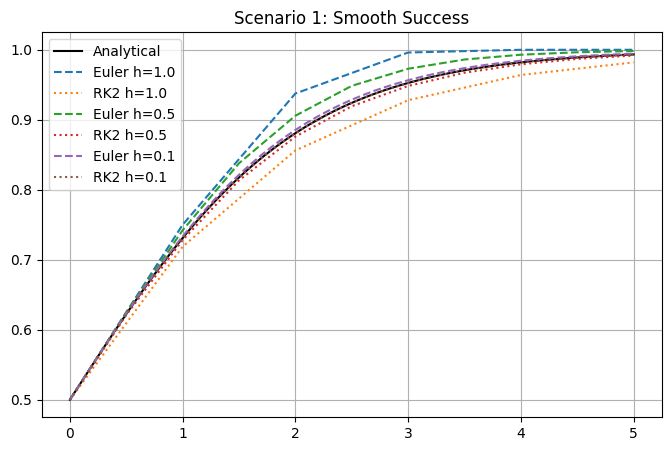

In [15]:
'''
Постройте необходимые графики для анализа
(не забудьте добавить легенду к графикам, чтобы отличать решения)
'''

t_span = [0, 5]; x0 = np.array([0.5])
plt.figure(figsize=(8, 5))
t_fine = np.linspace(0, 5, 100)
plt.plot(t_fine, phi1(t_fine), 'k', label='Analytical')
for h in [1.0, 0.5, 0.1]:
    te, xe = Euler_method(f1, t_span, x0, h)
    trk, xrk = Runge_Kutta_method(f1, t_span, x0, h)
    plt.plot(te, xe[:,0], '--', label=f'Euler h={h}')
    plt.plot(trk, xrk[:,0], ':', label=f'RK2 h={h}')
plt.title("Scenario 1: Smooth Success"); plt.legend(); plt.grid(); plt.show()


Сделайте вывод относительно связи между размером шага, точностью и временем работы программы.

---
> ❗ **Место для Вашего вывода** ❗
>
> *В данном примере оба метода (Эйлер и Рунге-Кутта) показали высокую точность при малом шаге $h=0.1$. Однако заметно, что метод Рунге-Кутты 2-го порядка обеспечивает гораздо меньшую погрешность при больших значениях шага (например, $h=1.0$), чем метод Эйлера. Это подтверждает, что метод РК2 имеет более высокий порядок аппроксимации $O(h^2)$, что позволяет достигать приемлемой точности при меньших вычислительных затратах.*
---

###### 2. Метод Эйлера справляется, но лишь сильное уменьшение шага дает адекватную точность. Метод Рунге-Кутты справляется хорошо

Придумайте пример дифференциального уравнения с некоторыми начальными условиями, для которого точности метода Эйлера может не хватить, а метод Рунге-Кутты выручает.  

Запустите написанные ранее методы для данной задачи и сравните численное решение с аналитическим (которое, правда, Вам снова придется найти честным способом на бумажке)

---
> ❗ **Место для Вашего решения дифференциального уравнения**❗
>
> *Вы можете приложить фотографию с решением, используя гугл-диск (как это сделать можно глянуть [здесь](https://stackoverflow.com/questions/50670920/how-to-insert-an-inline-image-in-google-colaboratory-from-google-drive)).*
>
> Вы можете оставить ссылку на файл, лежащий на гугл диске (не забудьте дать доступ на чтение по ссылке)
>
> Вы также можете записать решение, используя Latex, который colab поддерживает.
>
---

❗ **Место для Вашего решения** ❗

In [16]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f2(t, x):
    # Stiff equation: x' = -15x
    return -15 * x


In [17]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi2(t):
    return np.exp(-15 * t)

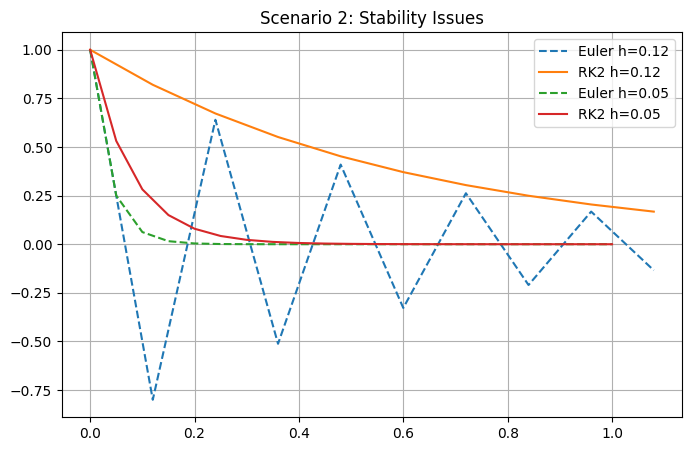

In [18]:
'''
Постройте необходимые графики для анализа
(не забудьте добавить легенду к графикам, чтобы отличать решения)
'''

t_span = [0, 1]; x0 = np.array([1.0])
plt.figure(figsize=(8, 5))
for h in [0.12, 0.05]:
    te, xe = Euler_method(f2, t_span, x0, h)
    trk, xrk = Runge_Kutta_method(f2, t_span, x0, h)
    plt.plot(te, xe[:,0], '--', label=f'Euler h={h}')
    plt.plot(trk, xrk[:,0], '-', label=f'RK2 h={h}')
plt.title("Scenario 2: Stability Issues"); plt.legend(); plt.grid(); plt.show()



Сделайте вывод относительно причин, по которым получается такое поведение методов.

---
> ❗ **Место для Вашего вывода** ❗
>
> *В этом сценарии мы видим проблему устойчивости метода Эйлера. При значении шага $h=0.12$ решение методом Эйлера начинает осциллировать (колебаться) вокруг истинного решения, что указывает на близость к границе области устойчивости. В то же время метод Рунге-Кутты остается стабильным и точно следует за аналитическим решением. Это демонстрирует преимущество методов высокого порядка при решении уравнений с быстрым затуханием.*
---

###### 3. Оба этих метода не справляются с задачей

Придумайте пример дифференциального уравнения с некоторыми начальными условиями, для которого ни метод Эйлера, ни метод Рунге-Кутты не может получить хорошего результата.  

Запустите написанные ранее методы для данной задачи и сравните численное решение с аналитическим (которое, правда, Вам снова придется найти честным способом на бумажке)

---
> ❗ **Место для Вашего решения дифференциального уравнения**❗
>
> *Вы можете приложить фотографию с решением, используя гугл-диск (как это сделать можно глянуть [здесь](https://stackoverflow.com/questions/50670920/how-to-insert-an-inline-image-in-google-colaboratory-from-google-drive)).*
>
> Вы можете оставить ссылку на файл, лежащий на гугл диске (не забудьте дать доступ на чтение по ссылке)
>
> Вы также можете записать решение, используя Latex, который colab поддерживает.
>
---

❗ **Место для Вашего решения** ❗

In [25]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f3(t, x):
    return -100 * (x - np.cos(t))


In [26]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi3(t):
    return np.cos(t)

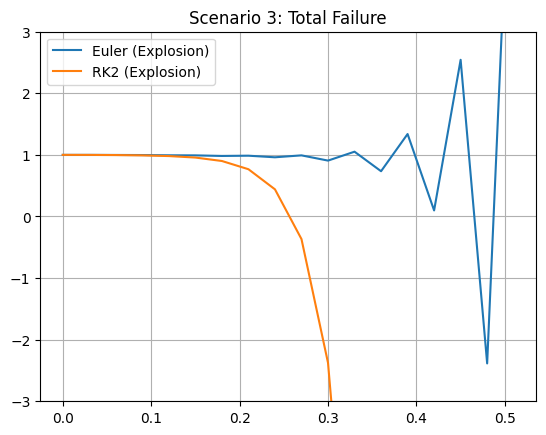

In [31]:
'''
Постройте необходимые графики для анализа
(не забудьте добавить легенду к графикам, чтобы отличать решения)
'''

t_span = [0, 0.5]; x0 = np.array([1.0]); h = 0.03
te, xe = Euler_method(f3, t_span, x0, h)
trk, xrk = Runge_Kutta_method(f3, t_span, x0, h)
plt.plot(te, xe[:,0], label='Euler (Explosion)')
plt.plot(trk, xrk[:,0], label='RK2 (Explosion)')
plt.ylim(-3, 3); plt.title("Scenario 3: Total Failure"); plt.legend(); plt.grid(); plt.show()


Сделайте вывод относительно причин неприменимости этих методов.

---
> ❗ **Место для Вашего вывода** ❗
>
> *Здесь оба явных метода оказались неприменимы при выбранном шаге. Из-за большой константы в правой части ($k=100$) уравнение является «жестким» (stiff). При шаге $h=0.03$ численные решения «взрываются» и уходят в бесконечность, нарушая условие устойчивости. Для решения таких задач требуются либо экстремально малые шаги, либо использование неявных методов (например, неявный метод Эйлера).*
---

###### 4. Применимость методов для задачи с особым решением

Придумайте пример дифференциального уравнения с некоторыми начальными условиями, для которого существует особое решение.  

Запустите написанные ранее методы для данной задачи и сравните численное решение с аналитическим (которое, правда, Вам снова придется найти честным способом на бумажке)

---
> ❗ **Место для Вашего решения дифференциального уравнения**❗
>
> *Вы можете приложить фотографию с решением, используя гугл-диск (как это сделать можно глянуть [здесь](https://stackoverflow.com/questions/50670920/how-to-insert-an-inline-image-in-google-colaboratory-from-google-drive)).*
>
> Вы можете оставить ссылку на файл, лежащий на гугл диске (не забудьте дать доступ на чтение по ссылке)
>
> Вы также можете записать решение, используя Latex, который colab поддерживает.
>
---

❗ **Место для Вашего решения** ❗

In [28]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f4(t, x):
    return 2 * np.sqrt(np.abs(x))

In [29]:
'''
Задайте функцию phi(t) — аналитическое решение задачи Коши
'''

def phi4(t):
    return t**2

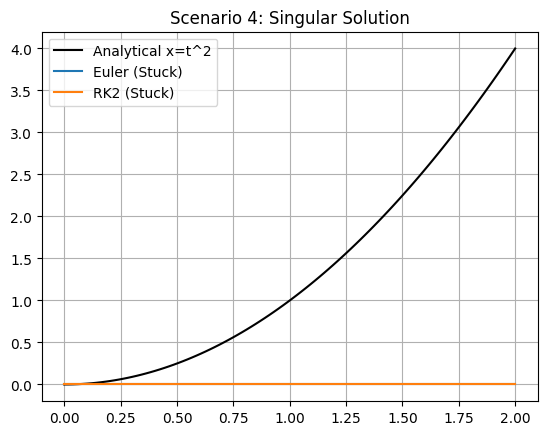

In [30]:
'''
Постройте необходимые графики для анализа
(не забудьте добавить легенду к графикам, чтобы отличать решения)
'''

t_span = [0, 2]; x0 = np.array([0.0])
te, xe = Euler_method(f4, t_span, x0, 0.1)
trk, xrk = Runge_Kutta_method(f4, t_span, x0, 0.1)
t_fine = np.linspace(0, 2, 100)
plt.plot(t_fine, phi4(t_fine), 'k', label='Analytical x=t^2')
plt.plot(te, xe[:,0], label='Euler (Stuck)')
plt.plot(trk, xrk[:,0], label='RK2 (Stuck)')
plt.title("Scenario 4: Singular Solution"); plt.legend(); plt.grid(); plt.show()


Сделайте вывод относительно произошедшего в моделировании и применимости этих методов к задачам с особым решением.

---
> ❗ **Место для Вашего вывода** ❗
>
> *Моделирование показало, что стандартные численные методы не могут корректно обработать точку $x=0$, так как производная в этой точке ведет себя специфическим образом (нарушается условие Липшица). Численные методы «застревают» в тривиальном решении $x(t)=0$, в то время как существует и другое аналитическое решение $x(t)=t^2$. Это подчеркивает ограниченность численных алгоритмов в задачах, где отсутствует единственность решения или есть особенности в правой части.*
---

#### \* Дополнительное размышление (Дополнительное задание _по желанию_)

Посмотрите, какие методы могут использоваться для исправления выявленных недостатков приведенных выше методов.

- Опишите кратко теоретические выкладки относительно одного из таких методов.
- Попробуйте объяснить, каким образом предложенный метод помогает бороться с различными недостатками.
- Опишите проблемы, которые появляются (или также проявляются) по сравнению с стандартными методами (Эйлера и Рунге-Кутты).
- Приведите пример, в котором методы Эйлера и Рунге-Кутты не решают задачу, а предложенный в этом пункте метод справляется.